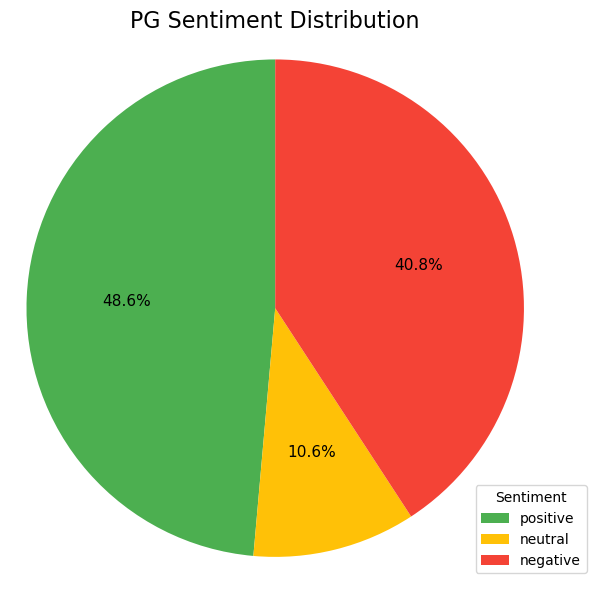

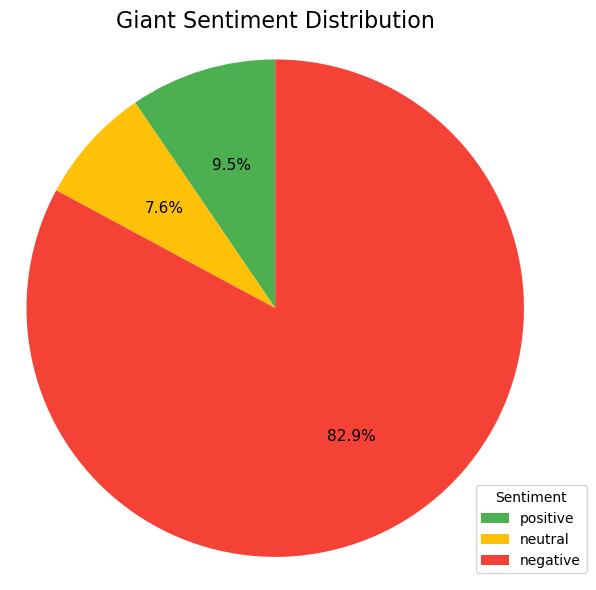

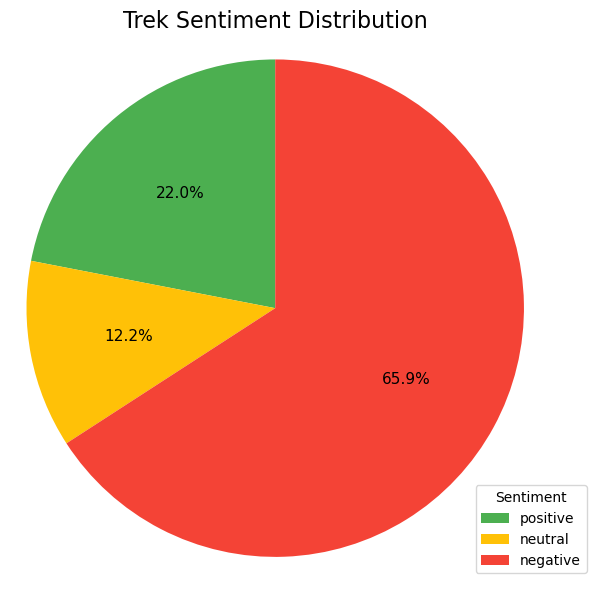

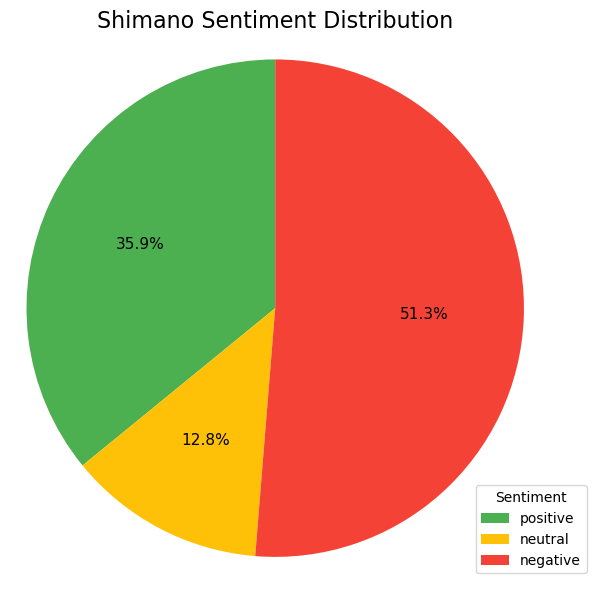

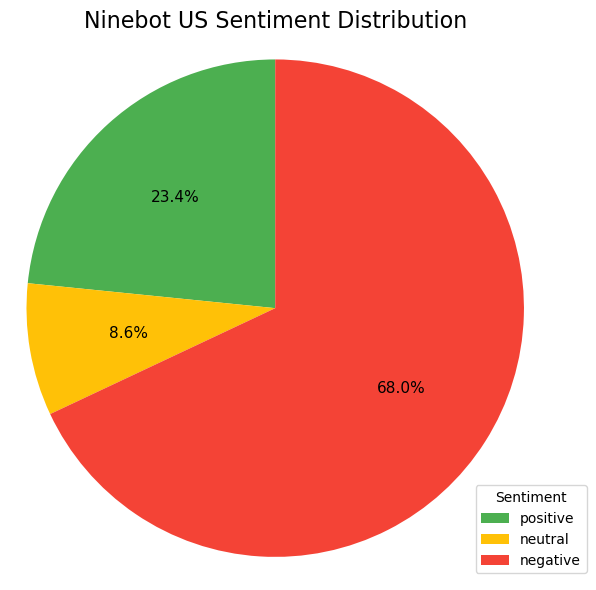

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

files = {
    "PG": '1094591345_us.csv',
    "Giant": '1536111825_us.csv',
    "Trek": '1609966547_us.csv',
    "Shimano": '1437969979_us.csv',
    "Ninebot US": '1484302191_us.csv'
}

# Fixed order and colors
sentiment_order = ["positive", "neutral", "negative"]
colors = ["#4CAF50", "#FFC107", "#F44336"]  # green, yellow, red

for label, file_path in files.items():
    df = pd.read_csv(file_path)

    if "sentiment" not in df.columns:
        print(f"{file_path} has no sentiment column. Skipping.")
        continue

    # Count sentiments and enforce order
    sentiment_counts = (
        df["sentiment"]
        .value_counts()
        .reindex(sentiment_order, fill_value=0)
    )

    plt.figure(figsize=(6, 6))

    wedges, texts, autotexts = plt.pie(
        sentiment_counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 11}
    )

    # Legend in bottom-right corner
    plt.legend(
        wedges,
        sentiment_order,
        title="Sentiment",
        loc="lower right",
        bbox_to_anchor=(1.1, 0)
    )

    plt.title(f"{label} Sentiment Distribution", fontsize=16)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(f"image_stats/{label}_sentiment_distribution.png")
    plt.show()

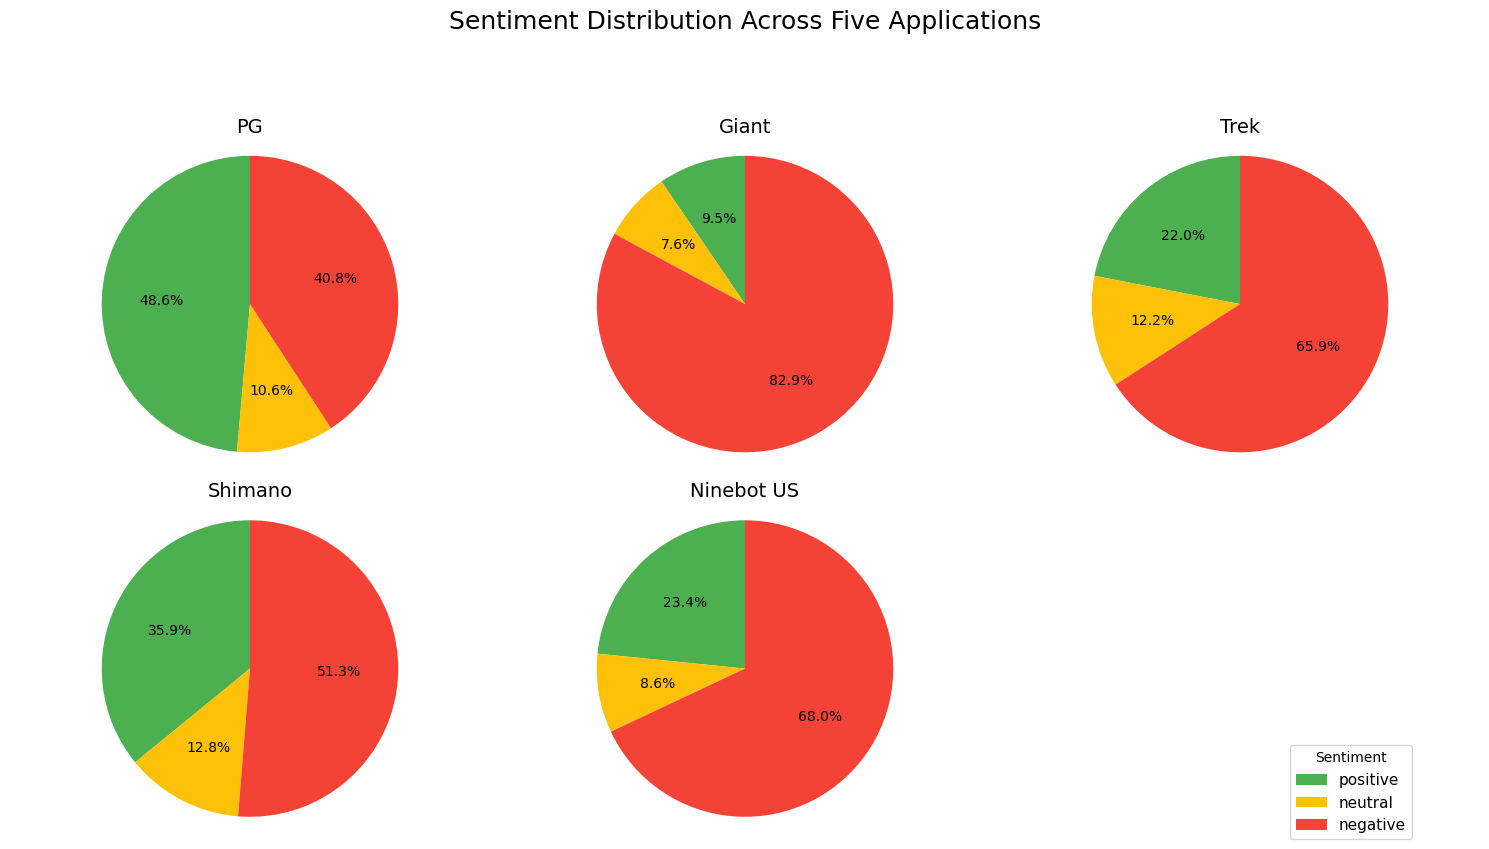

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

files = {
    "PG": '1094591345_us.csv',
    "Giant": '1536111825_us.csv',
    "Trek": '1609966547_us.csv',
    "Shimano": '1437969979_us.csv',
    "Ninebot US": '1484302191_us.csv'
}

sentiment_order = ["positive", "neutral", "negative"]
colors = ["#4CAF50", "#FFC107", "#F44336"]

# Create a 2x3 subplot canvas
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for idx, (label, file_path) in enumerate(files.items()):
    df = pd.read_csv(file_path)

    if "sentiment" not in df.columns:
        print(f"{file_path} has no sentiment column. Skipping.")
        continue

    sentiment_counts = (
        df["sentiment"]
        .value_counts()
        .reindex(sentiment_order, fill_value=0)
    )

    ax = axes[idx]

    wedges, texts, autotexts = ax.pie(
        sentiment_counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 10}
    )

    ax.set_title(label, fontsize=14)
    ax.axis('equal')

# Remove the unused last subplot (6th position)
axes[-1].axis('off')

# Shared legend (bottom-right of the whole figure)
fig.legend(
    wedges,
    sentiment_order,
    title="Sentiment",
    loc="lower right",
    bbox_to_anchor=(0.95, 0.05),
    fontsize=11
)

fig.suptitle("Sentiment Distribution Across Five Applications", fontsize=18)
plt.tight_layout(rect=[0, 0.05, 1, 0.92])

# Save combined figure
plt.savefig("image_stats/sentiment_distribution_all_apps.png", dpi=300)
plt.show()
